In [658]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


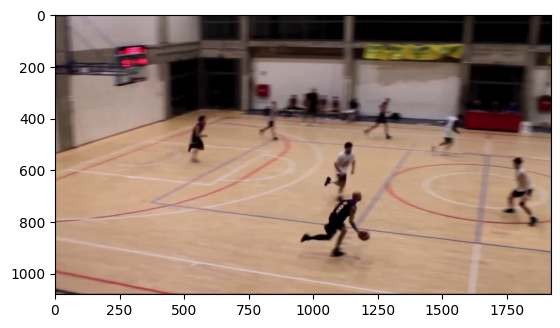

In [659]:
cap = cv2.VideoCapture("..\\input_videos\\tosti.mp4")

cap.set(cv2.CAP_PROP_POS_MSEC, 10000)
ret, frame1 = cap.read()
frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

plt.imshow(frame1)

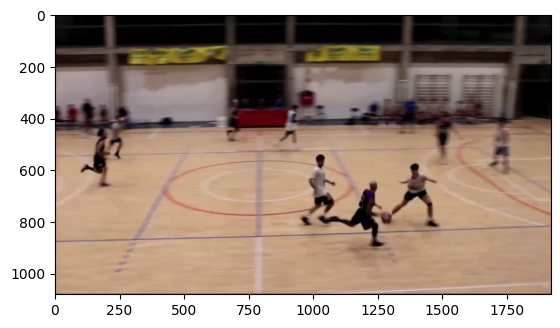

In [660]:
#move it 2 seconds forward
cap.set(cv2.CAP_PROP_POS_MSEC, 11000)
ret, frame2 = cap.read()
frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)

plt.imshow(frame2)

In [661]:
gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

In [662]:
cv2.imwrite("frame1.jpg", cv2.cvtColor(frame1, cv2.COLOR_RGB2BGR))
cv2.imwrite("frame2.jpg", cv2.cvtColor(frame2, cv2.COLOR_RGB2BGR))

True

In [663]:
def points_on_line(p1, p2, num_points=100):
    x_values = np.linspace(p1[0], p2[0], num_points)
    y_values = np.linspace(p1[1], p2[1], num_points)
    return list(zip(x_values, y_values))


In [664]:
def points_between(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    points = []
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy
    
    while True:
        points.append((x1, y1))
        if x1 == x2 and y1 == y2:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy
            
    return points

In [665]:
p1 = (161, 252)
p2 = (87, 250)
points = points_on_line(p1, p2)

In [666]:
points = np.array(points).reshape(-1, 1, 2).astype(np.float32)
next = [(102, 250), (151, 192)]

lk_params = dict(winSize=(20, 20), maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

out, status, error = cv2.calcOpticalFlowPyrLK(gray1, gray2, points, None, **lk_params)

out

array([[[ 8.66546555e+01,  2.26632172e+02]],

       [[ 9.78622055e+01,  2.27028931e+02]],

       [[ 1.12929749e+02,  2.27691116e+02]],

       [[ 1.21398941e+02,  2.28047165e+02]],

       [[ 1.32199127e+02,  2.28344620e+02]],

       [[ 1.39585388e+02,  2.28554459e+02]],

       [[ 1.47766525e+02,  2.28766891e+02]],

       [[ 1.56646469e+02,  2.28943024e+02]],

       [[ 1.60989334e+02,  2.29026169e+02]],

       [[ 1.72072372e+02,  2.29202271e+02]],

       [[ 1.76943863e+02,  2.29337250e+02]],

       [[ 1.80871841e+02,  2.29476013e+02]],

       [[ 2.03912201e+02,  2.30369888e+02]],

       [[ 2.13179092e+02,  2.31059738e+02]],

       [[ 2.33601837e+02,  2.33779770e+02]],

       [[ 2.31216949e+02,  2.36755188e+02]],

       [[ 2.31649887e+02,  2.37700241e+02]],

       [[ 2.34248520e+02,  2.40361740e+02]],

       [[ 2.38037460e+02,  2.41451385e+02]],

       [[ 2.42458267e+02,  2.42126617e+02]],

       [[ 2.46176971e+02,  2.43238495e+02]],

       [[ 2.51236450e+02,  2.42895

In [667]:
copy1 = frame1.copy()
copy2 = frame2.copy()
for i, point in enumerate(points):
    if status[i] and error[i] < 5:
        cv2.circle(copy1, (int(point[0][0]), int(point[0][1])), 3, (0, 0, 255), -1)
    
for i, point in enumerate(out):
    if status[i] and error[i] < 5:
        cv2.circle(copy2, (int(point[0][0]), int(point[0][1])), 3, (0, 255, 0), -1)
        #print(error[i])

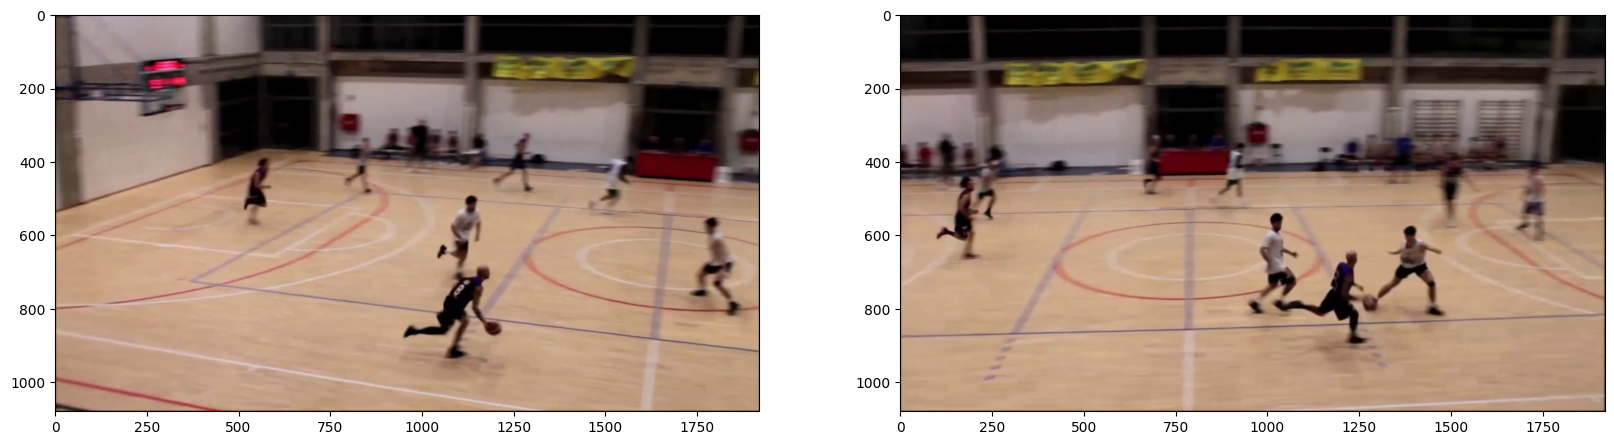

In [668]:
#Mostra frame1 e frame2 in due subplot
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(copy1)
plt.subplot(1, 2, 2)
plt.imshow(copy2)

In [669]:
input = []
output = []
for i, point in enumerate(out):
    if status[i] and error[i] < 5:
        input.append(points[i])
        output.append(point)

#delete the secon element from input
del input[1]
del output[1]

src = np.array(input, np.float32).reshape(-1, 1, 2)
dst = np.array(output, np.float32).reshape(-1, 1, 2)

M, s = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)

frame_out = cv2.warpPerspective(frame1, M, (frame1.shape[1], frame1.shape[0]))

IndexError: list assignment index out of range

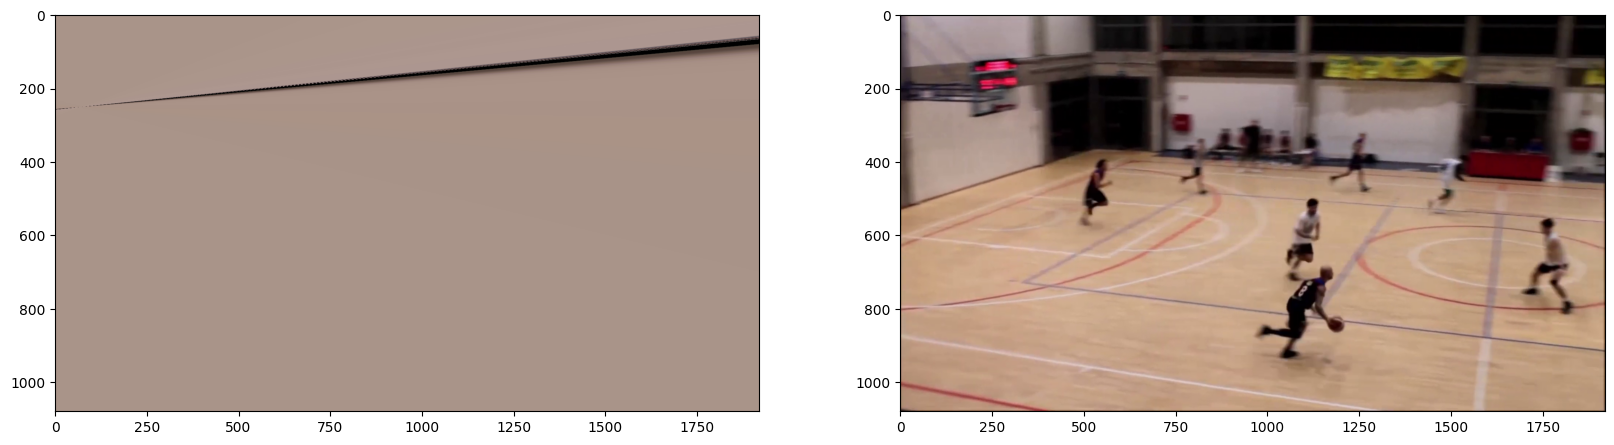

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(frame_out)
plt.subplot(1, 2, 2)
plt.imshow(frame2)

FINDING TRANSITION USING KEYPOINTS

In [670]:
def find_homography_points(img1, img2):
    # Initiate SIFT detector
    sift = cv2.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(gray1,None)
    kp2, des2 = sift.detectAndCompute(gray2,None)

    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1,des2,k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    return src_pts, dst_pts


In [671]:
img1 = frame1
img2 = frame2

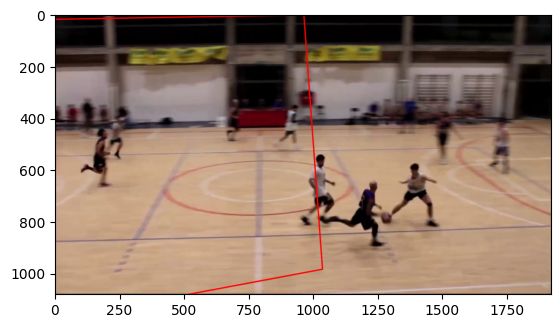

In [673]:
src_pts, dst_pts = find_homography_points(frame1, frame2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
matchesMask = mask.ravel().tolist()

h,w = img1.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
copy2 = img2.copy()
copy2 = cv2.polylines(copy2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

plt.imshow(copy2)

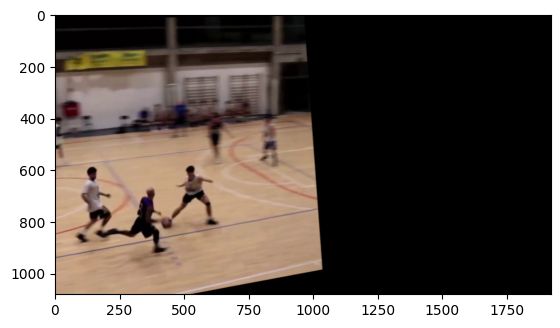

In [674]:
frame2_warped = cv2.warpPerspective(frame2, M, (frame2.shape[1], frame2.shape[0]))
plt.imshow(frame2_warped)

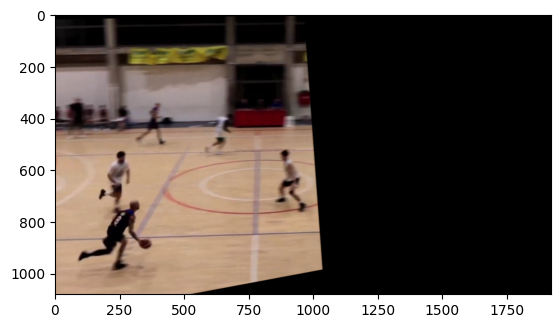

In [675]:
frame1_warped = cv2.warpPerspective(frame1, M, (frame1.shape[1], frame1.shape[0]))
plt.imshow(frame1_warped)